<a href="https://colab.research.google.com/github/he-ale/Machine-Learning-Basic/blob/main/ConcreteCompressiveStrength/ConcreteCompressiveStrength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de machine learning - Concrete Compressive Strength

## Obteniendo datos

https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone https://github.com/he-ale/Machine-Learning-Basic.git

fatal: destination path 'Machine-Learning-Basic' already exists and is not an empty directory.


In [3]:
dir= 'Machine-Learning-Basic/ConcreteCompressiveStrength/Concrete_Data.xlsx'

In [4]:
datos= pd.read_excel(dir, sheet_name="Sheet1")

In [5]:
datos.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

No existen datos nulos genial :)

## EDA

In [6]:
datos.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [7]:
sns.set_theme(style="darkgrid")

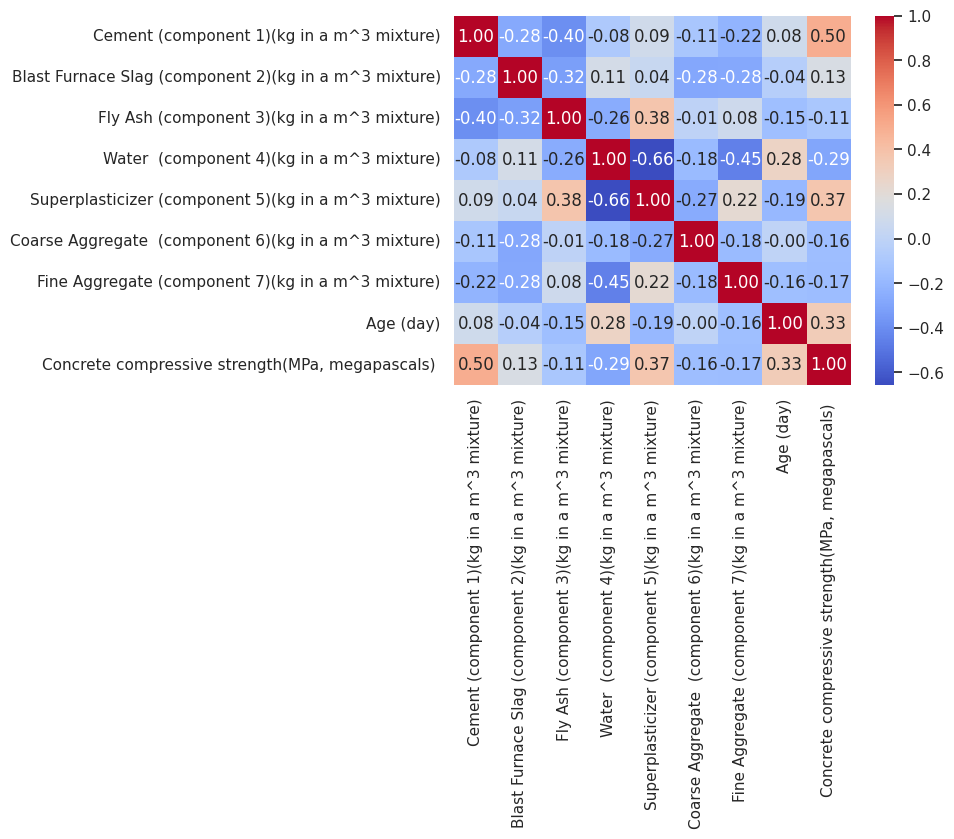

In [8]:
corr= np.corrcoef(datos.iloc[:, :].values.T)
sns.heatmap(corr,
            xticklabels=datos.columns,
            yticklabels=datos.columns,
            cmap='coolwarm',
            annot=True,
            fmt='.2f')
plt.show()

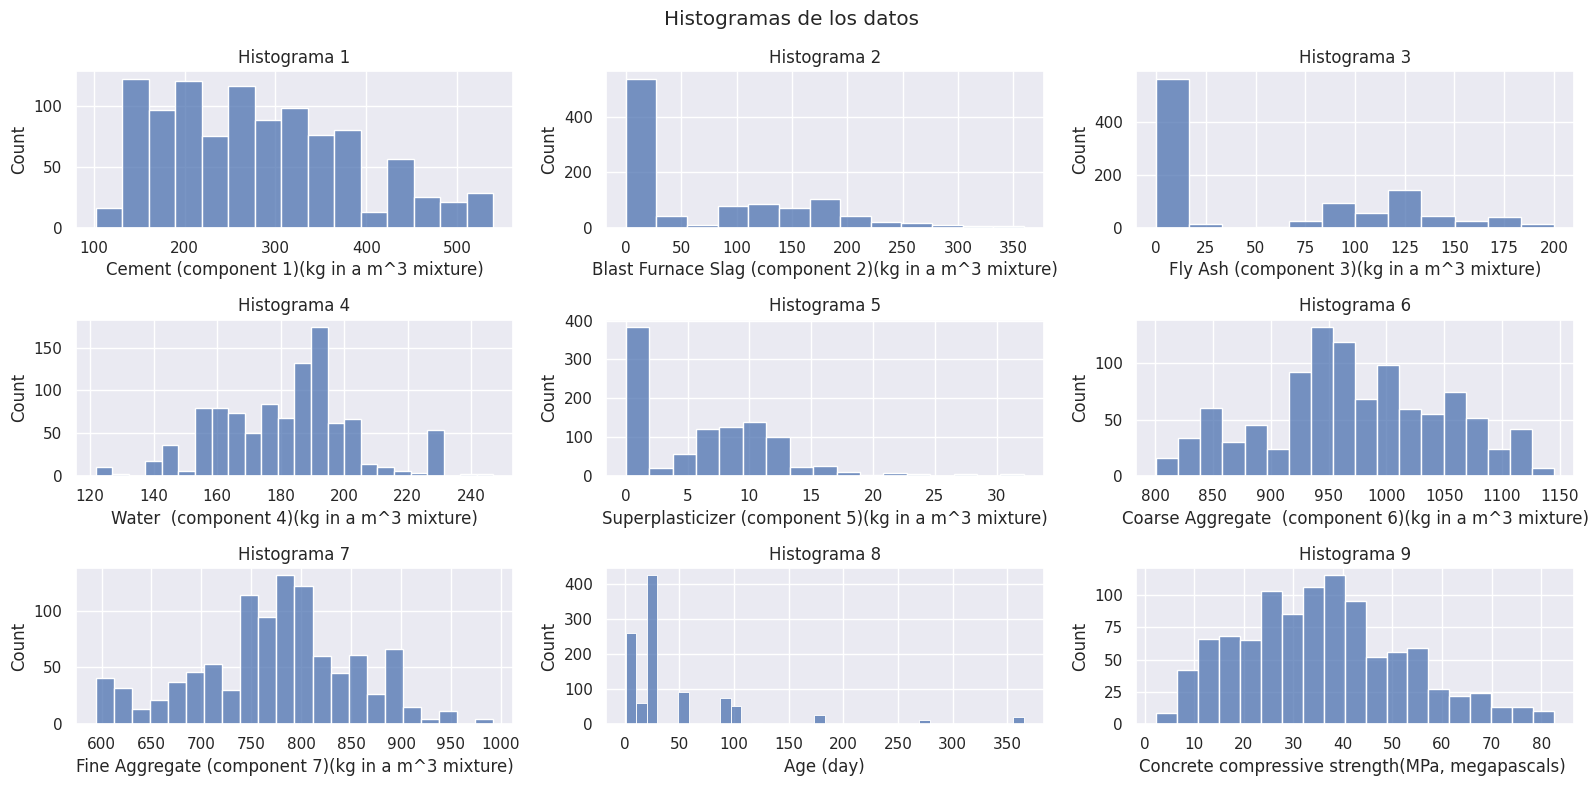

In [9]:
figure, axes = plt.subplots(3, 3, sharex=False, figsize=(16,8) )
figure.suptitle('Histogramas de los datos')
col= 0
for i in range(3):
  for j in range(3):
    if (col<len(datos.columns)):
      sns.histplot(ax=axes[i,j] , x= datos.iloc[:,col])
      axes[i,j].set(xlabel=datos.columns[col])
      axes[i,j].set_title(f"Histograma {col+1}")
      col +=1
figure.tight_layout()

En los histogramas se muestran los como son las distribuciones de los datos

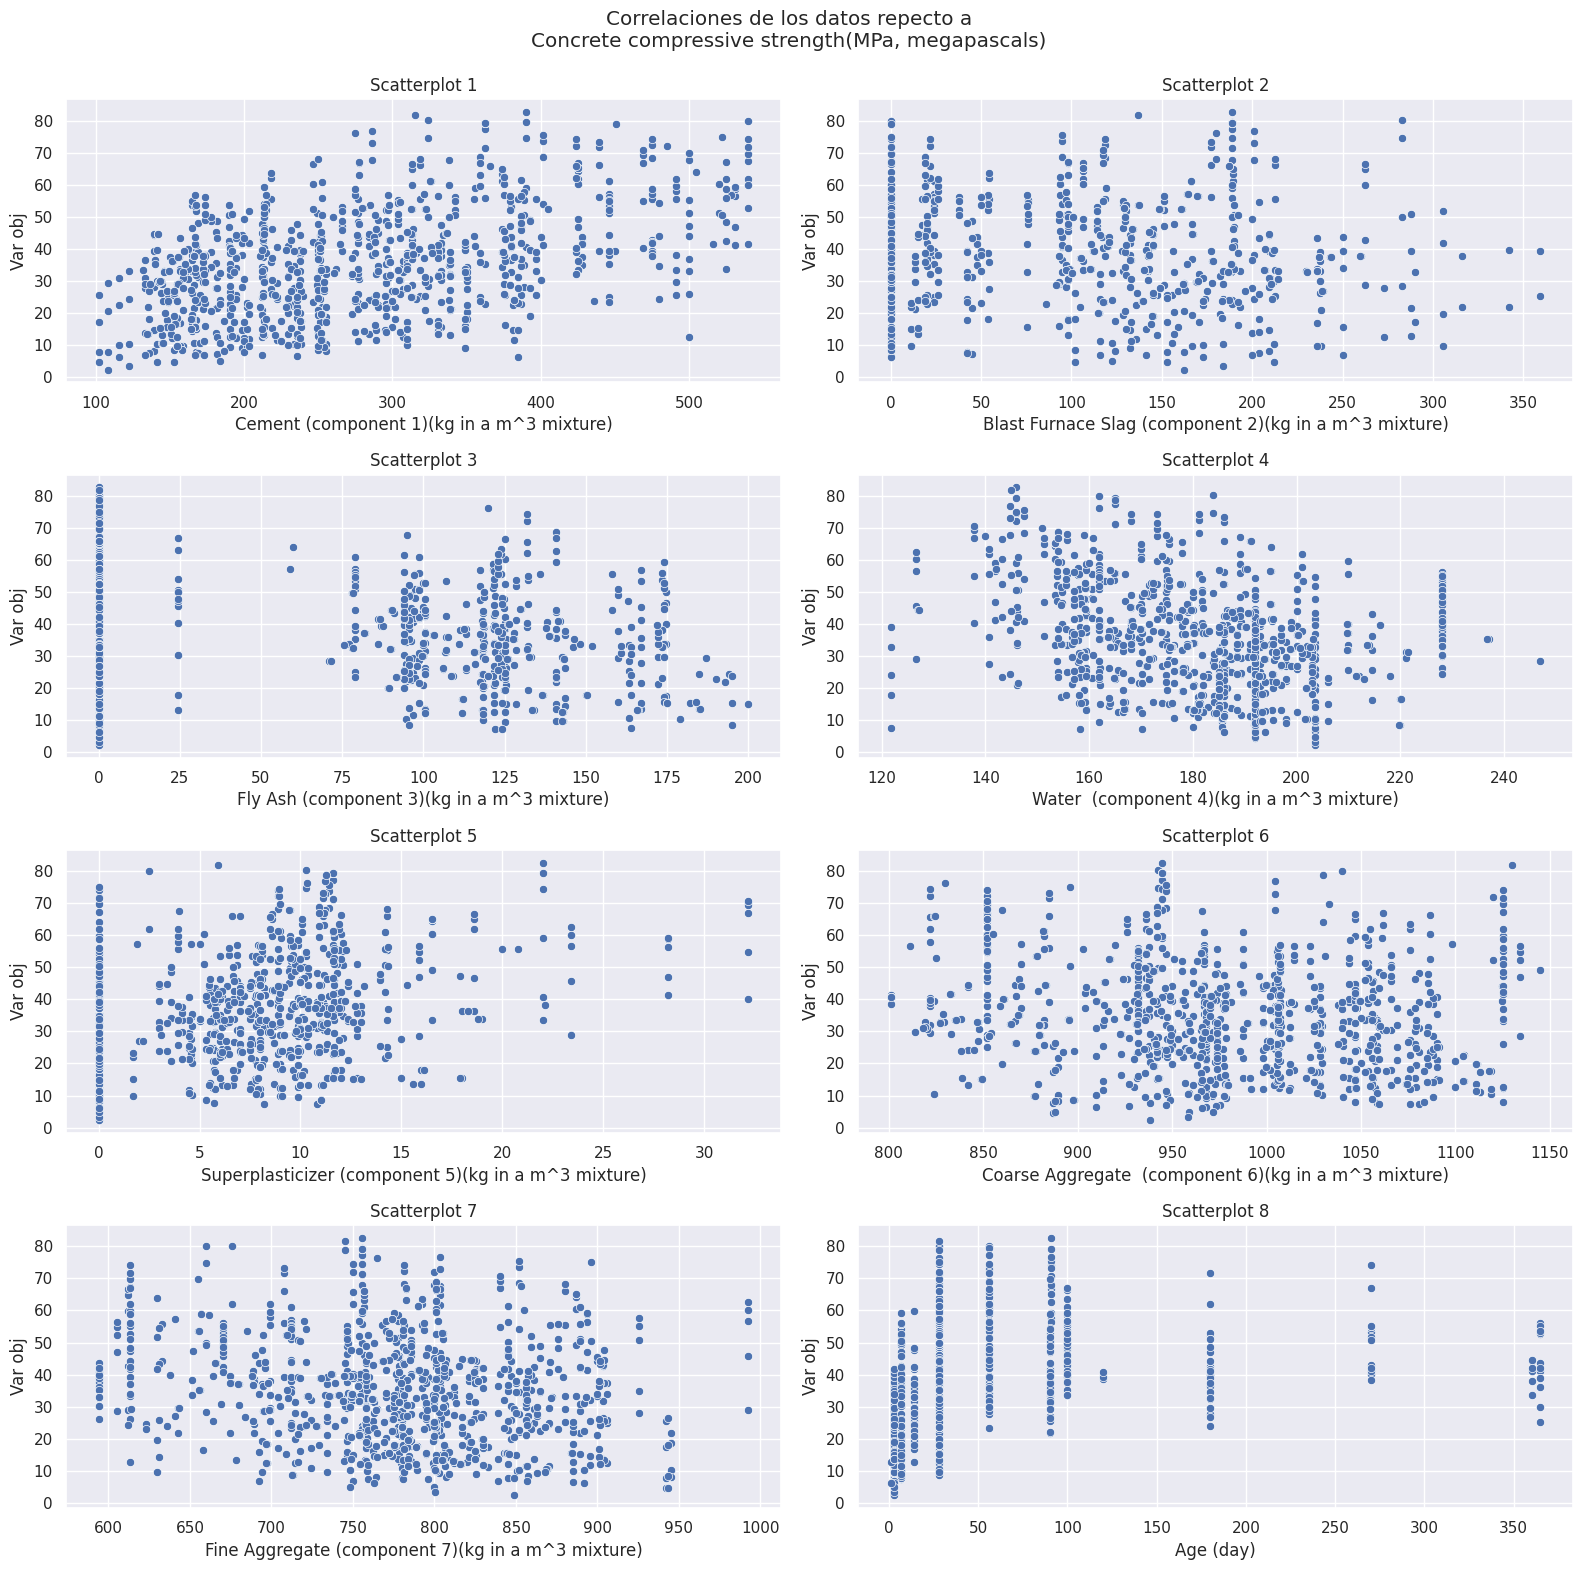

In [10]:
figureCor, axes= plt.subplots(4, 2, sharex=False, figsize=(16,16) )
figureCor.suptitle('Correlaciones de los datos repecto a \n'+datos.columns[8]+'\n' )
col= 0
for i in range(4):
  for j in range(2):
    sns.scatterplot(ax=axes[i,j], x=datos.columns[col], y=datos.columns[8], data=datos)
    axes[i,j].set(xlabel=datos.columns[col], ylabel="Var obj")
    axes[i,j].set_title(f"Scatterplot {col+1}")
    col +=1
figureCor.tight_layout()

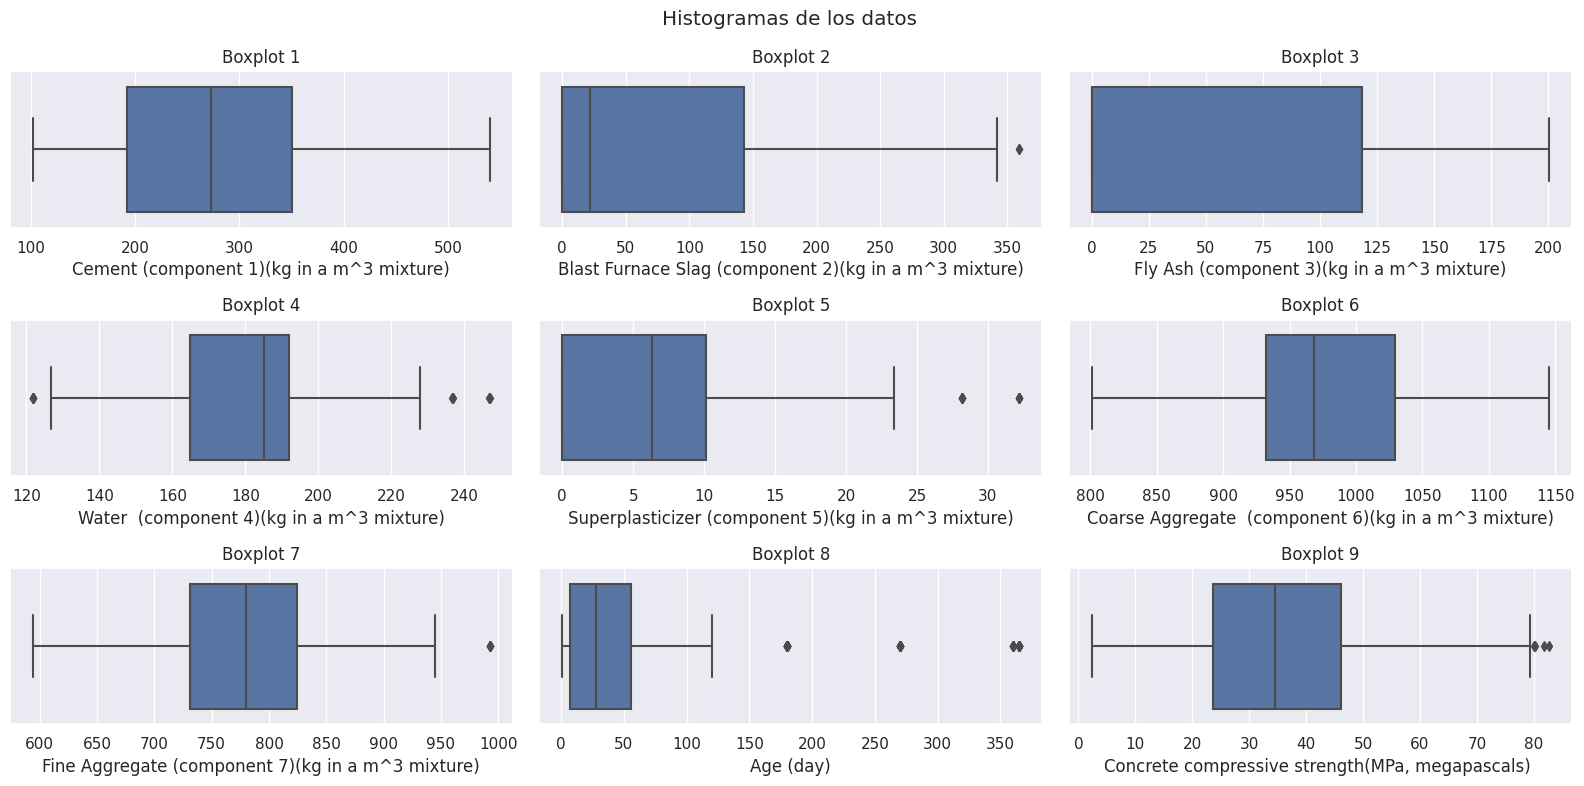

In [11]:
figureB, axes = plt.subplots(3, 3, sharex=False, figsize=(16,8) )
figureB.suptitle('Histogramas de los datos')
col= 0
for i in range(3):
  for j in range(3):
    if (col<len(datos.columns)):
      sns.boxplot(ax=axes[i,j] , x= datos.iloc[:,col])
      axes[i,j].set(xlabel=datos.columns[col])
      axes[i,j].set_title(f"Boxplot {col+1}")
      col +=1
figureB.tight_layout()

## Estandarizar datos
Como no se presentan datos faltantes se procede a estandarizar datos con la formular
$$
  X_{std}=\frac{X-min(X)}{max(X)-min(X)}
$$

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
X= datos.iloc[:, :-1].values
y= datos.iloc[:, -1].values
y

array([79.98611076, 61.88736576, 40.26953526, ..., 23.69660064,
       32.76803638, 32.40123514])

In [14]:
scaler_X= MinMaxScaler()
X= scaler_X.fit_transform(X)
scaler_y= MinMaxScaler()
y= scaler_y.fit_transform(y.reshape(-1,1))

In [15]:
y=y.reshape(1,-1)[0]

## Division de datos

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)

## Entrenando modelos
### Modelos de regresion

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [19]:
linear_regressor= LinearRegression()
linear_regressor.fit(X= X_train, y= y_train)

LinearRegression()

In [20]:
decision_tree= DecisionTreeRegressor(random_state=0)
decision_tree.fit(X= X_train, y= y_train)

DecisionTreeRegressor(random_state=0)

In [21]:
random_forest= RandomForestRegressor(n_estimators=100,random_state=0)
random_forest.fit(X= X_train, y= y_train)

RandomForestRegressor(random_state=0)

### Modelos de red neuronal

In [22]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers


In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [24]:
len(X_train[1,:])

8

In [25]:
inputs= len(X_train[1,:])
model_keras= keras.Sequential()
model_keras.add(layers.Dense(16, activation='linear', input_dim= inputs))
model_keras.add(layers.Dense(8, activation='linear'))
model_keras.add(layers.Dense(1))
model_keras.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
optimizador= keras.optimizers.RMSprop(learning_rate=0.01)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model_keras.compile(loss='mse',
              optimizer=optimizador,
              metrics=['mse'])

In [ ]:
history= model_keras.fit(x=X_train, y= y_train, epochs= 100, callbacks=[early_stop])

In [28]:
class Modelo_Pytorch(nn.Module):
  def __init__(self, inputs):
    super().__init__()
    self.layer_1= nn.Linear(inputs, 16)
    self.layer_2= nn.Linear(16, 8)
    self.layer_3= nn.Linear(8,1)

  def forward(self, x):
    res_f_l= F.relu(self.layer_1(x))
    res_s_l= F.relu(self.layer_2(res_f_l))
    return self.layer_3(res_s_l)

In [29]:
inputs= len(X_train[1,:])
model_pytorch= Modelo_Pytorch(inputs)


In [30]:
criterion= nn.MSELoss()
optimP= torch.optim.SGD(model_pytorch.parameters(), lr=0.01)

In [31]:
num_epochs=100
model_pytorch.train()
tensor_x=torch.from_numpy(X_train).float()
# para que sea compatible tensor_y.view(-1,1) para que sea compatible com la salida
tensor_y= torch.from_numpy(y_train).float().view(-1,1)
for epoch in range(num_epochs):
  outputs= model_pytorch(tensor_x)

  loss= criterion(outputs, tensor_y)

  optimP.zero_grad()
  loss.backward()
  optimP.step()

  if (epoch + 1) % 100 == 0:
      print(f'Época [{epoch+1}/{num_epochs}], Pérdida: {loss.item():.4f}')



Época [100/100], Pérdida: 0.0467


## Evaluar modelos

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
dataMetricas= pd.DataFrame()

In [34]:
list_mse=[]
list_mae=[]
list_rmse=[]

In [35]:
list_mse.append(mean_squared_error(y_test, linear_regressor.predict(X_test)))
list_mae.append(mean_absolute_error(y_test, linear_regressor.predict(X_test)))
list_rmse.append(mean_squared_error(y_test, linear_regressor.predict(X_test),squared=False))

In [36]:
list_mse.append(mean_squared_error(y_test, decision_tree.predict(X_test)))
list_mae.append(mean_absolute_error(y_test, decision_tree.predict(X_test)))
list_rmse.append(mean_squared_error(y_test, decision_tree.predict(X_test),squared=False))

In [37]:
list_mse.append(mean_squared_error(y_test, random_forest.predict(X_test)))
list_mae.append(mean_absolute_error(y_test, random_forest.predict(X_test)))
list_rmse.append(mean_squared_error(y_test, random_forest.predict(X_test),squared=False))

In [38]:
y_keras= model_keras.predict(X_test).reshape(1,-1)[0]
y_keras= y_keras.astype('float64')

list_mse.append(mean_squared_error(y_test, y_keras.reshape(1,-1,)[0]))
list_mae.append(mean_absolute_error(y_test, y_keras))
list_rmse.append(mean_squared_error(y_test, y_keras,squared=False))

10/10 [==============================] - 0s 2ms/step


In [39]:
model_pytorch.eval()
y_t=[]
with torch.no_grad():
  X_torch= torch.from_numpy(X_test).float()
  y_torch= model_pytorch(X_torch)
  y_t= y_torch.reshape(1,-1).numpy().reshape(1,-1)[0]

list_mse.append(mean_squared_error(y_test,y_t))
list_mae.append(mean_absolute_error(y_test, y_t))
list_rmse.append(mean_squared_error(y_test, y_t, squared=False))

In [40]:
dataMetricas["mse"]= list_mse
dataMetricas["mae"]= list_mae
dataMetricas["rmse"]= list_rmse

In [41]:
dataMetricas['Modelo']=["Regressor","Tree","Random Forest","Keras", "Pytorch"]

In [42]:
dataMetricas.set_index('Modelo', inplace=True)

In [43]:
dataMetricas

,mse,mae,rmse
Modelo,,,
Regressor,0.016201,0.102502,0.127282
Tree,0.007058,0.053967,0.084012
Random Forest,0.004054,0.044803,0.063669
Keras,0.017344,0.107456,0.131696
Pytorch,0.050094,0.184140,0.223817
